## Porblem Statement
To apply for a master's degree is a very expensive and intensive work. With this Machine Learning Excercise, students will guess their capacities and they will decide whether to apply for a master's degree or not.

So, basically this set is about the Graduate Admissions data i.e. Given a set of standardized scores like GRE, TOEFL, SOP standard scores, LOR standard scores, what is probability of gaining admission into a particular school. 

## Dataset
This dataset is created for prediction of graduate admissions and the dataset link is below:

Features in the dataset:

GRE Scores (290 to 340)

TOEFL Scores (92 to 120)

University Rating (1 to 5)

Statement of Purpose (1 to 5)

Letter of Recommendation Strength (1 to 5)

Undergraduate CGPA (6.8 to 9.92)

Research Experience (Yes or No)

Chance of Admit (0.34 to 0.97)

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# importing dataset
df = pd.read_csv("Admission_Prediction.csv")
df.head()

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337.0,118.0,4,4.5,4.5,9.65,Yes,0.92
1,2,324.0,107.0,4,4.0,4.5,8.87,Yes,0.76
2,3,316.0,104.0,3,3.0,3.5,8.00,Yes,0.72
3,4,322.0,110.0,3,3.5,2.5,8.67,Yes,0.80
4,5,314.0,103.0,2,2.0,3.0,8.21,No,0.65


In [5]:
# dropping unnecessary columns
df.drop('Serial_No.', axis=1, inplace=True)

In [6]:
# calculating duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())

True


In [7]:
# list all duplicate rows
print(df[dups])

     GRE_Score  TOEFL_Score  University_Rating  SOP  LOR  CGPA Research  \
170      311.0         99.0                  2  2.5  3.0  7.98       No   
214      338.0        120.0                  4  5.0  5.0  9.66      Yes   
235      312.0        107.0                  2  2.5  3.5  8.27       No   
375      324.0        110.0                  3  3.5  3.0  9.22      Yes   
483      318.0        103.0                  3  4.0  4.5  8.49      Yes   

     Chance_of_Admit  
170             0.65  
214             0.95  
235             0.69  
375             0.89  
483             0.71  


In [8]:
df.shape

(505, 8)

In [9]:
# deleting duplicate rows
df = df.drop_duplicates()
print(df.shape)

(500, 8)


In [10]:
# dealing with categorical data
df=pd.get_dummies(df)
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Chance_of_Admit,Research_No,Research_Yes
0,337.0,118.0,4,4.5,4.5,9.65,0.92,0,1
1,324.0,107.0,4,4.0,4.5,8.87,0.76,0,1
2,316.0,104.0,3,3.0,3.5,8.00,0.72,0,1
3,322.0,110.0,3,3.5,2.5,8.67,0.80,0,1
4,314.0,103.0,2,2.0,3.0,8.21,0.65,1,0


In [11]:
# getting detail information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 504
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          483 non-null    float64
 1   TOEFL_Score        498 non-null    float64
 2   University_Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Chance_of_Admit    500 non-null    float64
 7   Research_No        500 non-null    uint8  
 8   Research_Yes       500 non-null    uint8  
dtypes: float64(6), int64(1), uint8(2)
memory usage: 32.2 KB


In [12]:
# changing data types of Research No/Yes columns to float
df['Research_No'] = df['Research_No'].astype(float, errors = 'raise')
df['Research_Yes'] = df['Research_Yes'].astype(float, errors = 'raise')

In [13]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 504
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          483 non-null    float64
 1   TOEFL_Score        498 non-null    float64
 2   University_Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Chance_of_Admit    500 non-null    float64
 7   Research_No        500 non-null    float64
 8   Research_Yes       500 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 39.1 KB


In [14]:
# getting general statistics of the data
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Chance_of_Admit,Research_No,Research_Yes
count,483.000000,498.000000,500.000000,500.000000,500.00000,500.000000,500.00000,500.000000,500.000000
mean,316.585921,107.164659,3.114000,3.374000,3.48400,8.576440,0.72174,0.440000,0.560000
std,11.352261,6.075729,1.143512,0.991004,0.92545,0.604813,0.14114,0.496884,0.496884
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.34000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.63000,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,0.72000,0.000000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,0.82000,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,0.97000,1.000000,1.000000


In [15]:
# checking missing values
df.isnull().sum()

GRE_Score            17
TOEFL_Score           2
University_Rating     0
SOP                   0
LOR                   0
CGPA                  0
Chance_of_Admit       0
Research_No           0
Research_Yes          0
dtype: int64

In [16]:
# filling missing values of GRE & TOEFL Score with mean
df['GRE_Score'] = df['GRE_Score'].fillna(df['GRE_Score'].mean())
df['TOEFL_Score'] = df['TOEFL_Score'].fillna(df['TOEFL_Score'].mean())
# df.dropna(axis=0, inplace=True)

In [17]:
# df['TOEFL_Score'] = df['TOEFL_Score'].astype(float, errors = 'raise')
# df['GRE_Score'] = df['GRE_Score'].astype(float, errors = 'raise')

Text(0.5, 1.0, 'Correlation Factors Heat Map')

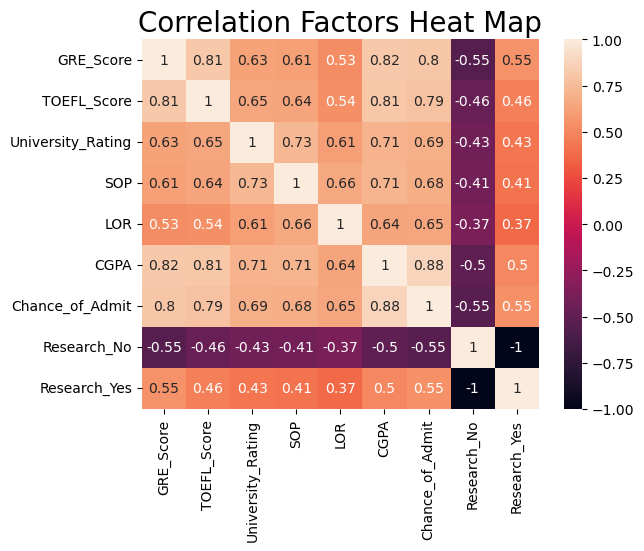

In [18]:
# Creating Correlation coeffecients heatmap
sns.heatmap(df.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

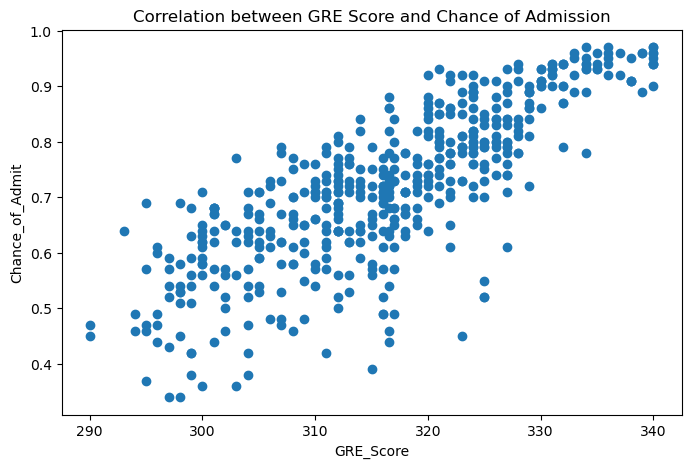

In [19]:
# correlation between GRE Score and Chance of Admission
plt.figure(figsize=(8,5))
plt.scatter('GRE_Score','Chance_of_Admit',data=df)
plt.xlabel('GRE_Score')
plt.ylabel('Chance_of_Admit')
plt.title('Correlation between GRE Score and Chance of Admission')
plt.show()

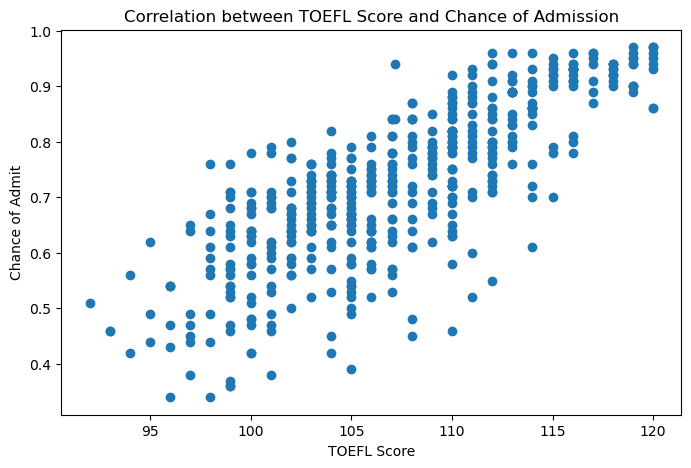

In [20]:
# Correlation between TOEFL Score and Chance of Admission
plt.figure(figsize=(8,5))
plt.scatter('TOEFL_Score','Chance_of_Admit',data=df)
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.title('Correlation between TOEFL Score and Chance of Admission')
plt.show()

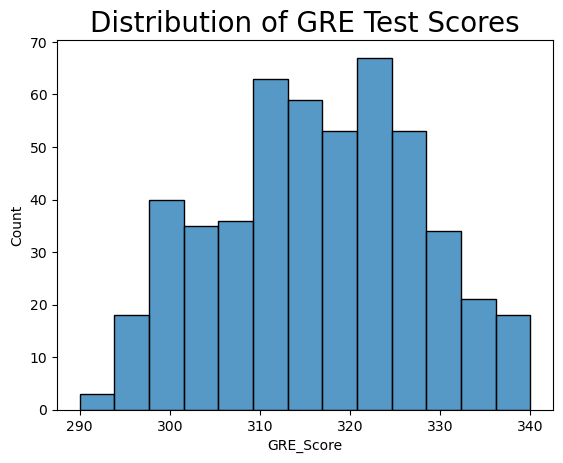

In [21]:
# Distribution of GRE Score
sns.histplot(df['GRE_Score']).set_title('Distribution of GRE Test Scores', size='20')
plt.show()

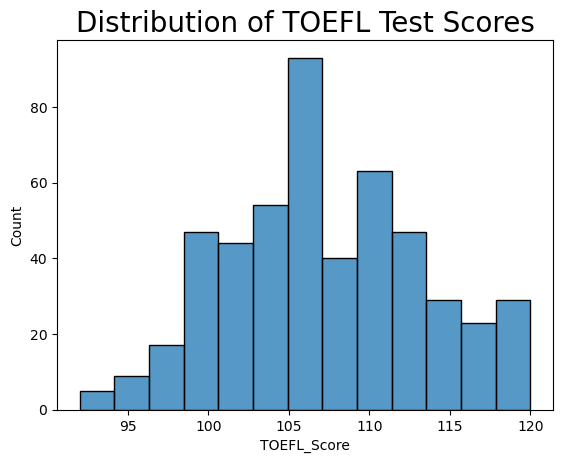

In [22]:
# Distribution of TOEFL
sns.histplot(df['TOEFL_Score']).set_title('Distribution of TOEFL Test Scores', size='20')
plt.show()

<AxesSubplot:xlabel='count', ylabel='University_Rating'>

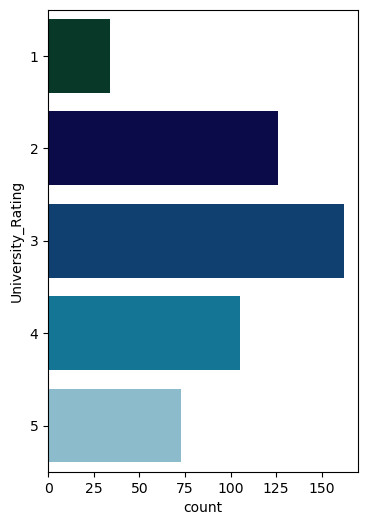

In [23]:
# displaying count plot for University Rating
plt.figure(figsize=(4,6))
sns.countplot(y='University_Rating',data=df,palette='ocean')

In [24]:
# separating features and target columns
X = df.drop(['Chance_of_Admit'], axis=1)
y = df['Chance_of_Admit']

In [25]:
# Standardization of CGPA, GRE_Score , TOEFL_Score columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['CGPA','GRE_Score', 'TOEFL_Score']] = scaler.fit_transform(X[['CGPA','GRE_Score', 'TOEFL_Score']])

In [26]:
# Splitting dataset into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [27]:
# Applying Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("r_square score for Linear Regression: ", r2_score(y_test, y_pred))

r_square score for Linear Regression:  0.7982772518789639


In [28]:
# Applying Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test) 
print("r_square score for Random Forest Regressor: ", r2_score(y_test, y_pred_rfr))

r_square score for Random Forest Regressor:  0.800162642118758


In [29]:
# Applying Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred_dtr = dtr.predict(X_test) 
from sklearn.metrics import r2_score
print("r_square score for Decision Tree Regressor: ", r2_score(y_test,y_pred_dtr))

r_square score for Decision Tree Regressor:  0.6299768725996666


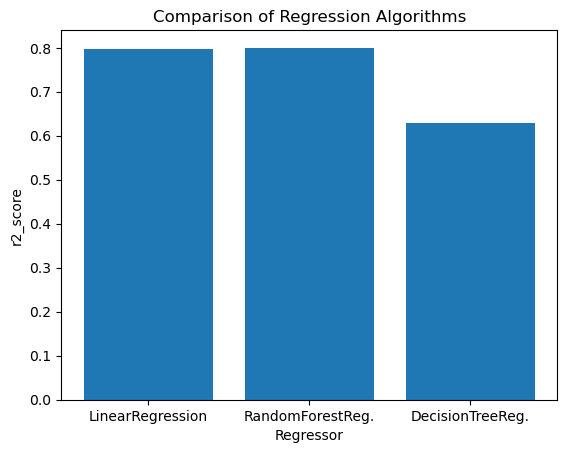

In [30]:
# Comparison of Regression Algorithms
y = np.array([r2_score(y_test,y_pred),r2_score(y_test,y_pred_rfr),r2_score(y_test,y_pred_dtr)])
x = ["LinearRegression","RandomForestReg.","DecisionTreeReg."]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.show()

### Results show that Linear Regression and Random Forest Regression are performing quite similar particularly for the given dataset. However, accuracy of Decision Tree Regression is low as compared to Linear Regression and Random Forest Regression.